In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df= pd.read_csv("Monthly-champagne-record.csv")
df.columns= ["Month", "Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [15]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [16]:
df.drop(106, axis=0, inplace=True)

In [17]:
df.drop(105, axis=0, inplace=True)

In [18]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [19]:
df["Month"]=pd.to_datetime(df["Month"]) #converting Months column string values to DataTime objects

In [21]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


Text(0, 0.5, 'Sales (Millions)')

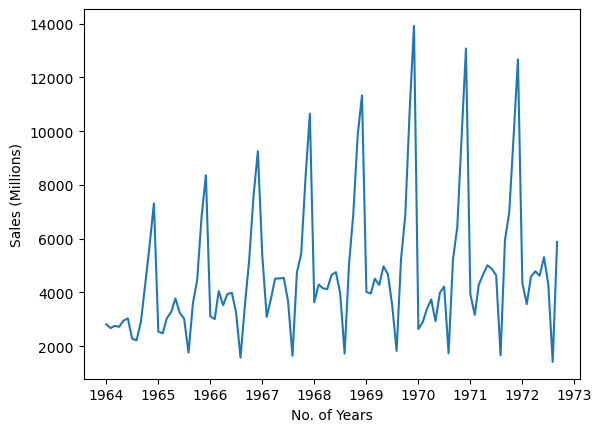

In [29]:
plt.plot(df["Month"], df["Sales"])

plt.xlabel("No. of Years")
plt.ylabel("Sales (Millions)")

In [24]:
from statsmodels.tsa.stattools import adfuller #Augmented Dickey-Fuller test

In [36]:
test_results= adfuller(df["Sales"])
test_results

(-1.8335930563276297,
 0.3639157716602417,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [55]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    results= adfuller(sales)
    labels= ['ADF Test Statistic', 'p-value', '#Logs Used', '# of observations used']
    
    for result, label in zip(results, labels):
        print(label, ':', result)
    
    if results[1] < 0.05:
        print("H0 is rejected, " + "H1 accepted")
    else:
        print("H0 is accepted, " + "H1 rejected")


In [45]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Logs Used : 11
# of observations used : 93
H0 is accepted


In [46]:
df['Seasonal_First_Difference']= df['Sales'] - df['Sales'].shift(12)

In [50]:
df.head(14)

,Month,Sales,Seasonal_First_Difference
0,1964-01-01,2815.0,NaN
1,1964-02-01,2672.0,NaN
2,1964-03-01,2755.0,NaN
3,1964-04-01,2721.0,NaN
4,1964-05-01,2946.0,NaN
5,1964-06-01,3036.0,NaN
6,1964-07-01,2282.0,NaN
7,1964-08-01,2212.0,NaN
8,1964-09-01,2922.0,NaN
9,1964-10-01,4301.0,NaN


In [56]:
adfuller_test(df['Seasonal_First_Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Logs Used : 0
# of observations used : 92
H0 is rejected, H1 accepted


Text(0, 0.5, 'Sales (Millions)')

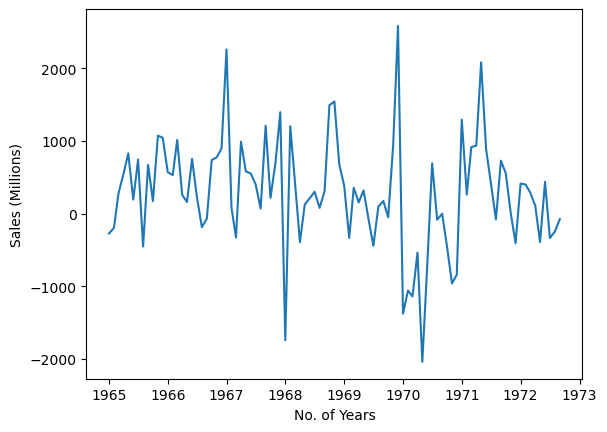

In [58]:
plt.plot(df["Month"], df['Seasonal_First_Difference'])

plt.xlabel("No. of Years")
plt.ylabel("Sales (Millions)")